In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline

In [6]:
data = pd.read_csv("../data/obs/data_kourkchi_tully.csv")
keys = ['pgc', 'Name', 'RA', 'DE', 'GLong', 'GLat', 'lgL_K', 'Vhel', 'Vls',
       'D_i', 'eDi', 'PGC1', 'PGC1+', 'Ng', 'gGLong', 'gGLat', 'gSGL', 'gSGB',
       'gK_t', 'glgL_K', 'gVh', 'gVls', 'gND', 'gD', 'geD', 'gsigL', 'gsigV',
       'gR2t', 'gMassL', 'gMassdyn', 'SGX', 'SGY', 'SGZ']
data = data[keys]

In [7]:
data[0:10]


,pgc,Name,RA,DE,GLong,GLat,lgL_K,Vhel,Vls,D_i,...,gD,geD,gsigL,gsigV,gR2t,gMassL,gMassdyn,SGX,SGY,SGZ
0,35,UGC12894,0.0938,39.4955,112.3102,-22.3207,7.54,335,618,0.00,...,0.00,0,21,0,0.057,10.276,NaN,6.90,-3.47,2.86
1,38,UGC12893,0.1188,17.2203,105.9151,-43.9611,8.44,1108,1338,0.00,...,0.00,0,30,0,0.081,10.724,NaN,10.95,-13.05,5.30
2,43,ESO293-027,0.1229,-40.4844,337.9255,-72.9984,9.79,3181,3147,0.00,...,0.00,0,53,0,0.145,11.484,NaN,-11.49,-40.36,-0.14
3,143,WLM,0.4926,-15.4609,75.8635,-73.6245,7.71,-122,-29,0.96,...,0.96,5,23,0,0.061,10.362,NaN,0.13,-0.94,0.14
4,156,IC5377,0.5224,16.5903,106.1972,-44.6719,8.63,1050,1278,0.00,...,9.84,8,116,92,0.315,12.498,12.272,6.06,-7.36,2.87
5,171,UGC12921,0.5877,77.2569,120.1543,14.6507,10.36,2419,2695,0.00,...,0.00,0,76,0,0.207,11.950,NaN,33.21,7.90,11.23
6,181,ESO012-014,0.6766,-80.3482,305.4559,-36.5399,8.92,1956,1741,12.13,...,12.13,25,36,0,0.097,10.963,NaN,-9.54,-6.96,-2.79
7,187,ESO149-013,0.6945,-52.7716,319.1268,-62.7997,8.46,1443,1346,0.00,...,0.00,0,30,0,0.082,10.737,NaN,-8.20,-15.89,-1.51
8,218,NGC7814,0.8121,16.1456,106.4089,-45.1746,10.84,1059,1284,14.45,...,9.84,8,116,92,0.315,12.498,12.272,8.73,-10.76,4.08
9,255,UGC00017,0.9302,15.2182,106.2149,-46.0989,8.69,879,1101,19.41,...,9.84,8,116,92,0.315,12.498,12.272,11.52,-14.67,5.38


11.66


(array([1048., 1059.,  829.,  695.,  607.,  449.,  206.,   27.,    0.]),
 array([ 9.        ,  9.33333333,  9.66666667, 10.        , 10.33333333,
        10.66666667, 11.        , 11.33333333, 11.66666667, 12.        ]),
 <a list of 9 Patch objects>)

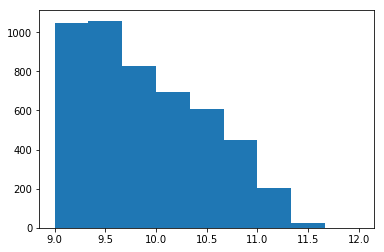

In [28]:
jj = data['pgc']==data['PGC1']
print(data['lgL_K'][jj].max())
a = np.array(data['lgL_K'][jj])
plt.hist(a, bins=np.linspace(9,12,10))

In [29]:
data[data['Name']=='Andromeda']

,pgc,Name,RA,DE,GLong,GLat,lgL_K,Vhel,Vls,D_i,...,gD,geD,gsigL,gsigV,gR2t,gMassL,gMassdyn,SGX,SGY,SGZ
136,2557,Andromeda,10.6848,41.2689,121.1744,-21.5731,10.78,-300,-32,0.78,...,0.75,3,111,114,0.302,12.441,12.447,0.7,-0.31,0.17


In [30]:
data[data['Name']=='Milky Way']

,pgc,Name,RA,DE,GLong,GLat,lgL_K,Vhel,Vls,D_i,...,gD,geD,gsigL,gsigV,gR2t,gMassL,gMassdyn,SGX,SGY,SGZ
14820,5064336,Milky Way,266.4167,-29.0078,359.9443,-0.0461,10.51,-8,-34,0.01,...,0.01,3,89,78,0.241,12.146,12.935,-0.01,0.0,0.01


In [31]:
ii = (data['lgL_K']>10.00) & (data['pgc']==data['PGC1'])
print(np.count_nonzero(ii))

1960


In [32]:
sub_data = data[ii]
print(len(sub_data))

1960


In [33]:
sub_data[:5]

,pgc,Name,RA,DE,GLong,GLat,lgL_K,Vhel,Vls,D_i,...,gD,geD,gsigL,gsigV,gR2t,gMassL,gMassdyn,SGX,SGY,SGZ
5,171,UGC12921,0.5877,77.2569,120.1543,14.6507,10.36,2419,2695,0.00,...,0.00,0,76,0,0.207,11.950,NaN,33.21,7.90,11.23
8,218,NGC7814,0.8121,16.1456,106.4089,-45.1746,10.84,1059,1284,14.45,...,9.84,8,116,92,0.315,12.498,12.272,8.73,-10.76,4.08
11,279,NGC7817,0.9952,20.7523,108.2283,-40.7605,10.99,2309,2548,29.38,...,29.38,14,130,71,0.353,12.646,11.487,19.43,-20.26,8.66
14,307,NGC7820,1.1283,5.2002,101.8517,-55.7391,10.72,3053,3237,0.00,...,0.00,0,103,0,0.279,12.338,NaN,19.77,-37.01,10.10
20,474,ESO293-034,1.5828,-41.5000,332.8212,-72.9086,10.06,1512,1470,0.00,...,0.00,0,64,56,0.172,11.709,11.348,-5.45,-18.44,-0.53


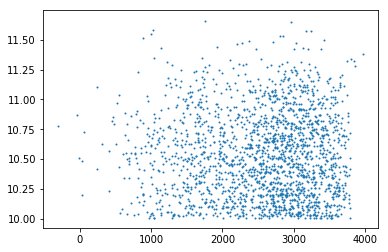

In [34]:
plt.scatter(sub_data['Vhel'], sub_data['lgL_K'], s=1.0)

In [35]:
nearest_id = []
dist = []
name = np.array(sub_data['Name'])
pgc = np.array(sub_data['pgc'])
pos = np.array(sub_data[['SGX', 'SGY', 'SGZ']])
vh = np.array(sub_data['Vhel'])
for i,p in enumerate(pgc):
    d = np.sqrt((pos[:,0]-pos[i,0])**2 + (pos[:,1]-pos[i,1])**2 + (pos[:,2]-pos[i,2])**2)
    ii = np.argsort(d)
    #print(i, pos[i], pos[ii[1]], d[ii[1]], pgc[ii[1]])
    nearest_id.append(ii[1])
    dist.append(d[ii[1]])

array([1059, 2309, 3053, 3100, 3233, 3219, 3301, 1602, 2616, 1685, 1605,
       -300,  243, 1629, 3397, 2614, 2297, 2347, 3527, 3635, 3518, 2272,
       2518, 2472, 2379, 2801, 1872, 1481,  657, 3168, 2988,  856, 1506,
       1745, 3090, 1620, 1733, 2935, 3155, 2472, 1362, 3558, 2846, 1735,
       3398, 3383, 3441,  528, 1485, 1340, 1933, 1543, 1550,   66, 2562,
       2694,  637, 1137, 1435, 1271, 2740, 3415, 3476, 3042, 2335, 3126,
       1954, 1384, 2387, 3385, 2742, 2205, 2740, 2664, 3207, 1651, 2342,
        788, 2836, 1620, 1710, 1760, 2839, 1570, 1106, 1679, 1965, 3135,
       2215, 1425, 1636, 1297, 1779, 2119, 2536, 1753, 1698, 2494,  895,
       1040, 3587, 1201, 2461, 3049, 3371, 3255, 3325, 3316, 2476, 1331,
       2732, 2739, 3052, 3549, 3269, 2299,  968, 2029, 3460, 2743, 3420,
       2558, 3548, 2962, 3130, 1659, 3135, 3152, 2998, 2941, 2142, 3087,
       3085, 2844, 3732, 2410, 3132, 3585, 2977, 3019, 1867, 2858, 2831,
       2306, 2908, 2741,  893, 2443, 3111, 1514, 27

In [36]:
pair_distance = []
pair_delta_vel = []
n_pair = 0
for i,j in enumerate(nearest_id):
    if(nearest_id[j]==i):
        #print(i,j)
        pair_distance.append(dist[i])
        pair_delta_vel.append(vh[i] - vh[j])
        if dist[i]<1.0:
            print(name[i], name[j], dist[i], dist[j])        
            n_pair = n_pair+1
print(n_pair)
pair_distance = np.array(pair_distance)
pair_delta_vel = np.array(pair_delta_vel)

Andromeda Milky Way 0.7910752176626442 0.7910752176626442
Maffei 1 IC0342 0.6744627491566899 0.6744627491566899
NGC1032 UGC02199 0.7695453203028396 0.7695453203028396
UGC02199 NGC1032 0.7695453203028396 0.7695453203028396
UGC02765 PGC166476 0.5381449618829474 0.5381449618829474
NGC1366 NGC1406 0.5375872022286239 0.5375872022286239
NGC1406 NGC1366 0.5375872022286239 0.5375872022286239
IC0342 Maffei 1 0.6744627491566899 0.6744627491566899
ESO424-012 ESO424-017 0.6074537019394971 0.6074537019394971
ESO424-017 ESO424-012 0.6074537019394971 0.6074537019394971
NGC2089 PGC017976 0.7994998436522706 0.7994998436522706
PGC017976 NGC2089 0.7994998436522706 0.7994998436522706
NGC2211 ESO556-015 0.7349829930005182 0.7349829930005182
ESO556-015 NGC2211 0.7349829930005182 0.7349829930005182
ESO208-021 ESO209-009 0.9561380653441216 0.9561380653441216
ESO560-004 PGC086069 0.68563838865688 0.68563838865688
ESO209-009 ESO208-021 0.9561380653441216 0.9561380653441216
NGC2655 NGC2748 0.7566372975210771 0.7

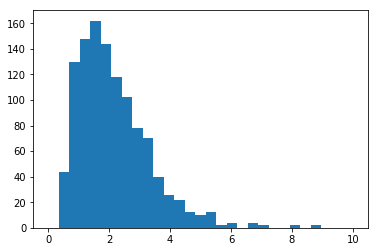

In [37]:
_ = plt.hist(pair_distance, bins=np.linspace(0,10,30))

312.1512968077586


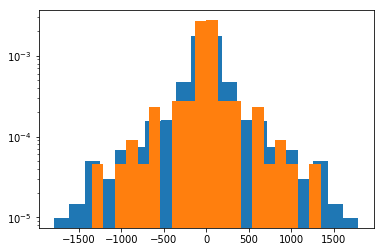

In [38]:
_ = plt.hist(pair_delta_vel, bins=20, density=True, log=True)
_ = plt.hist(pair_delta_vel[pair_distance<1.0], bins=20, density=True)
print(np.std(pair_delta_vel[pair_distance<1.0]))

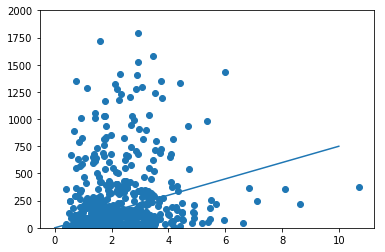

In [39]:
plt.scatter(pair_distance, pair_delta_vel)
plt.ylim([0,2000])
x = np.linspace(0,10)
plt.plot(x, 75*x)

In [40]:
pair_distance[-1], pair_delta_vel[-1]

(2.194971526011214, -326)